In [1]:
import torch
import matplotlib.pyplot as plt
from source.functions.vae import *
from source.functions.one_hot_encode import *

In [2]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
data=torch.load('/u/dssc/acesa000/fast/Street_View_Generator_data/hf_dataset_processed.pt')
print(len(data))

165030


In [4]:
print(data[0][1])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


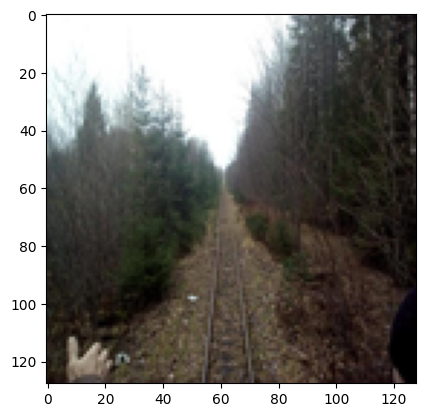

In [5]:
plt.imshow(data[0][0].permute(1,2,0))

In [6]:
%%capture
model=VariationalAutoEncoder(256)
model.load_state_dict(torch.load('models/model5e-05_256.pt',map_location=device))
model.eval()

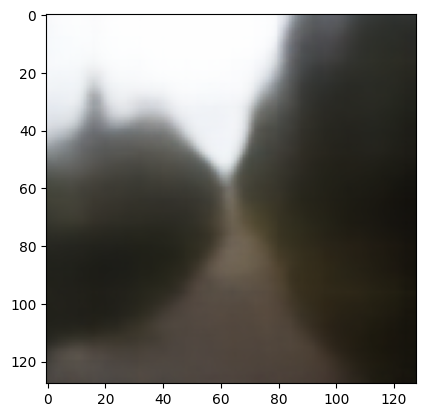

In [7]:
gen_imm=model(data[0][0].unsqueeze(0),data[1][1].unsqueeze(0))[0]
plt.imshow(gen_imm[0].permute(1,2,0).detach().numpy() )

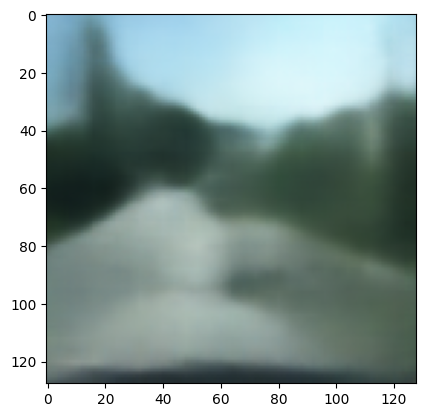

In [15]:
gen_imm=model.generate('United States')
plt.imshow(gen_imm[0].permute(1,2,0).detach().numpy() )